# IMPORTING LIBRARIES

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')


#  Data Description

The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the year 2019. Specifically, the data covers a **Facebook Ad campaign** and an **AdWords Ad campaign**. For each day of the year 2019, there is a corresponding row in the dataset, resulting in a total of **365 lines per campaign**. 

The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

---

###  Key Features:

- **Date**: The date corresponding to each row of campaign data (January 1st, 2019 to December 31st, 2019).
- **Campaign**: Specifies the type of campaign — "Facebook" or "AdWords".
- **Ad Views**: Number of times the ad was displayed (impressions).
- **Ad Clicks**: Number of times users clicked the ad.
- **Ad Conversions**: Number of successful conversions (e.g., sign-ups, purchases).
- **Cost per Ad**: Daily cost incurred for running the ad.
- **Click-Through Rate (CTR)**: Ratio of clicks to views — *CTR = Clicks / Views*.
- **Conversion Rate**: Ratio of conversions to clicks — *Conversions / Clicks*.
- **Cost per Click (CPC)**: Average cost per click — *Cost / Clicks*.


In [156]:
#loading dataset
df=pd.read_csv('ad_2019.csv')

In [157]:
df.head()

,Date,Campaign,Ad Views,Ad Clicks,Ad Conversions,Cost per Ad,Click-Through Rate (CTR),Conversion Rate,Cost per Click (CPC)
0,2019-01-01,Facebook,7770,364,78,342.575308,0.046847,0.214286,0.941141
1,2019-01-02,Facebook,1360,119,32,214.113762,0.087500,0.268908,1.799275
2,2019-01-03,Facebook,5890,841,364,302.304737,0.142784,0.432818,0.359459
3,2019-01-04,Facebook,5691,206,18,266.477848,0.036198,0.087379,1.293582
4,2019-01-05,Facebook,6234,219,90,448.249260,0.035130,0.410959,2.046800


In [158]:
df.dtypes

Date                         object
Campaign                     object
Ad Views                      int64
Ad Clicks                     int64
Ad Conversions                int64
Cost per Ad                 float64
Click-Through Rate (CTR)    float64
Conversion Rate             float64
Cost per Click (CPC)        float64
dtype: object

In [159]:
df['Date']=pd.to_datetime(df['Date'])

In [160]:
df.describe()

,Date,Ad Views,Ad Clicks,Ad Conversions,Cost per Ad,Click-Through Rate (CTR),Conversion Rate,Cost per Click (CPC)
count,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2019-07-02 00:00:00,5324.767123,561.273973,156.216438,277.203912,0.104250,0.277114,1.367184
min,2019-01-01 00:00:00,504.000000,13.000000,2.000000,50.060612,0.010259,0.041667,0.033852
25%,2019-04-02 00:00:00,3036.750000,195.000000,41.000000,166.605096,0.057667,0.174171,0.285029
50%,2019-07-02 00:00:00,5594.500000,431.000000,108.000000,278.437408,0.104875,0.280094,0.550776
75%,2019-10-01 00:00:00,7550.250000,866.250000,217.750000,394.573504,0.150078,0.383683,1.309205
max,2019-12-31 00:00:00,9999.000000,1988.000000,839.000000,499.019385,0.199529,0.498288,30.024191
std,NaN,2696.819969,439.504227,151.610186,132.266247,0.054082,0.127657,2.534449


In [161]:
adwords_df = df[df['Campaign'] == 'AdWords']
adwords_df.describe()

,Date,Ad Views,Ad Clicks,Ad Conversions,Cost per Ad,Click-Through Rate (CTR),Conversion Rate,Cost per Click (CPC)
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2019-07-02 00:00:00,5379.150685,566.953425,155.632877,277.681375,0.104516,0.270661,1.335833
min,2019-01-01 00:00:00,509.000000,15.000000,2.000000,50.060612,0.010452,0.047619,0.033852
25%,2019-04-02 00:00:00,3165.000000,191.000000,38.000000,169.512275,0.057665,0.170455,0.290481
50%,2019-07-02 00:00:00,5679.000000,438.000000,103.000000,275.180516,0.106516,0.272000,0.545721
75%,2019-10-01 00:00:00,7602.000000,889.000000,209.000000,396.571195,0.152720,0.376682,1.410599
max,2019-12-31 00:00:00,9999.000000,1988.000000,839.000000,499.019385,0.199529,0.495164,17.043839
std,NaN,2720.127489,445.276609,155.706268,133.247445,0.054543,0.128421,2.180359


In [162]:
facebook_df = df[df['Campaign'] == 'Facebook']
facebook_df.describe()

,Date,Ad Views,Ad Clicks,Ad Conversions,Cost per Ad,Click-Through Rate (CTR),Conversion Rate,Cost per Click (CPC)
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2019-07-02 00:00:00,5270.383562,555.594521,156.800000,276.726449,0.103984,0.283567,1.398536
min,2019-01-01 00:00:00,504.000000,13.000000,3.000000,50.106886,0.010259,0.041667,0.042293
25%,2019-04-02 00:00:00,3011.000000,200.000000,45.000000,163.692092,0.057672,0.181818,0.282733
50%,2019-07-02 00:00:00,5431.000000,426.000000,110.000000,282.235559,0.104302,0.289973,0.562744
75%,2019-10-01 00:00:00,7535.000000,818.000000,222.000000,389.164475,0.148650,0.388582,1.251558
max,2019-12-31 00:00:00,9992.000000,1915.000000,783.000000,498.351099,0.199136,0.498288,30.024191
std,NaN,2675.935587,434.191955,147.612058,131.458902,0.053691,0.126735,2.847555


In [163]:
from scipy.stats import ttest_ind

# Extract ad clicks from both campaigns
facebook_clicks = facebook_df['Ad Clicks']
adwords_clicks = adwords_df['Ad Clicks']

# Perform independent t-test
t_stat, p_value = ttest_ind(facebook_clicks, adwords_clicks)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -0.34893380818515163
P-value: 0.7272398979629799


In [164]:
from scipy.stats import ttest_ind

# 1. Ad Clicks
t_clicks, p_clicks = ttest_ind(facebook_df['Ad Clicks'], adwords_df['Ad Clicks'])

# 2. Click-Through Rate (CTR)
t_ctr, p_ctr = ttest_ind(facebook_df['Click-Through Rate (CTR)'], adwords_df['Click-Through Rate (CTR)'])

# 3. Conversion Rate
t_conv, p_conv = ttest_ind(facebook_df['Conversion Rate'], adwords_df['Conversion Rate'])

# 4. Cost per Click (CPC)
t_cpc, p_cpc = ttest_ind(facebook_df['Cost per Click (CPC)'], adwords_df['Cost per Click (CPC)'])

# Display results
print("Hypothesis Test Results:")
print(f"1. Ad Clicks             => t = {t_clicks:.4f}, p = {p_clicks:.4f}")
print(f"2. Click-Through Rate    => t = {t_ctr:.4f}, p = {p_ctr:.4f}")
print(f"3. Conversion Rate       => t = {t_conv:.4f}, p = {p_conv:.4f}")
print(f"4. Cost per Click (CPC)  => t = {t_cpc:.4f}, p = {p_cpc:.4f}")


Hypothesis Test Results:
1. Ad Clicks             => t = -0.3489, p = 0.7272
2. Click-Through Rate    => t = -0.1328, p = 0.8944
3. Conversion Rate       => t = 1.3666, p = 0.1722
4. Cost per Click (CPC)  => t = 0.3340, p = 0.7385


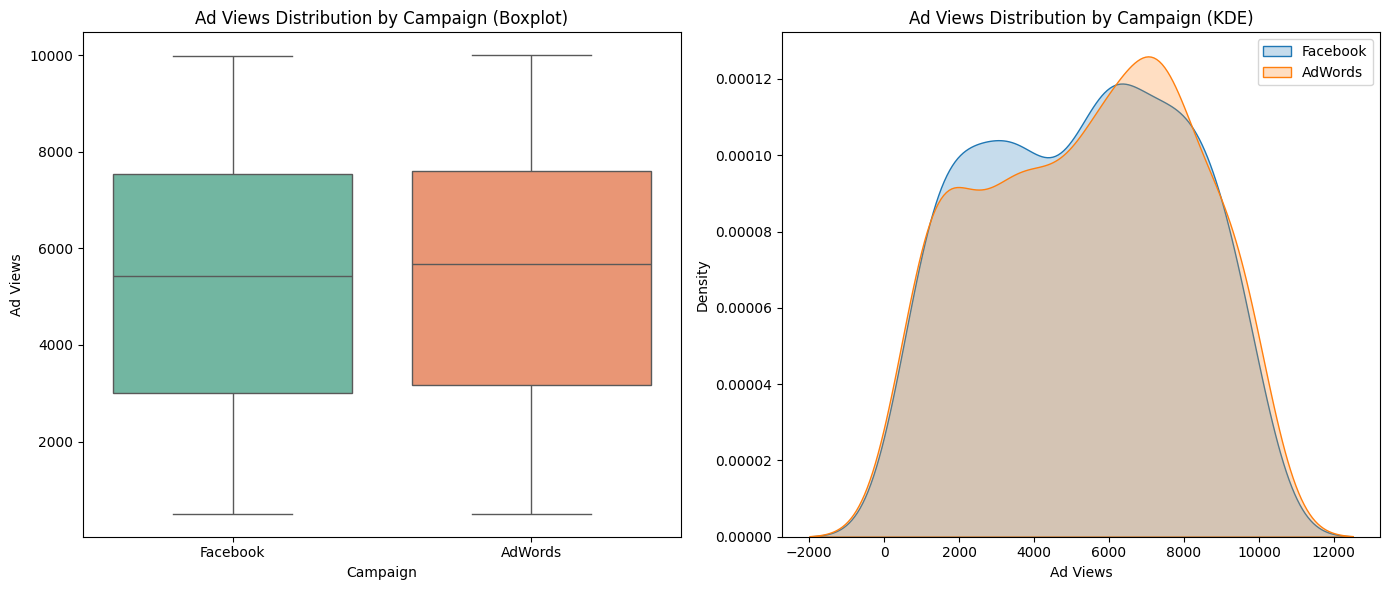

In [165]:
#adviews analysis for both campaign
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# 1. Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Campaign', y='Ad Views', data=df, palette='Set2')
plt.title('Ad Views Distribution by Campaign (Boxplot)')

# 2. KDE Plot (Smoothed Histogram)
plt.subplot(1, 2, 2)
sns.kdeplot(data=facebook_df['Ad Views'], label='Facebook', fill=True)
sns.kdeplot(data=adwords_df['Ad Views'], label='AdWords', fill=True)
plt.title('Ad Views Distribution by Campaign (KDE)')
plt.xlabel('Ad Views')
plt.legend()

plt.tight_layout()
plt.show()


###  Ad Views Analysis – Conclusion

Based on both the **boxplot** and **KDE plot** of daily *Ad Views*:

- The **median ad views** for Facebook and AdWords campaigns are almost identical, indicating similar central tendencies.
- The **interquartile ranges (IQR)** and **overall spread** are very close, suggesting both campaigns reached a similar volume of audience on a daily basis.
- The **KDE plot** confirms that the distribution of views is nearly the same across both platforms, with *AdWords* slightly peaking around the 6000–7000 range and *Facebook* showing a broader spread in the 4000–6000 range.
- There are **no significant outliers or skewness** in either distribution.

---

### Conclusion:
Both the **Facebook** and **AdWords** campaigns performed similarly in terms of **reach (ad views)**. Since impressions alone do not indicate ad effectiveness, further analysis is needed on **engagement and conversions** (e.g., *Ad Clicks*, *CTR*, *Conversion Rate*) to determine which campaign was more successful.


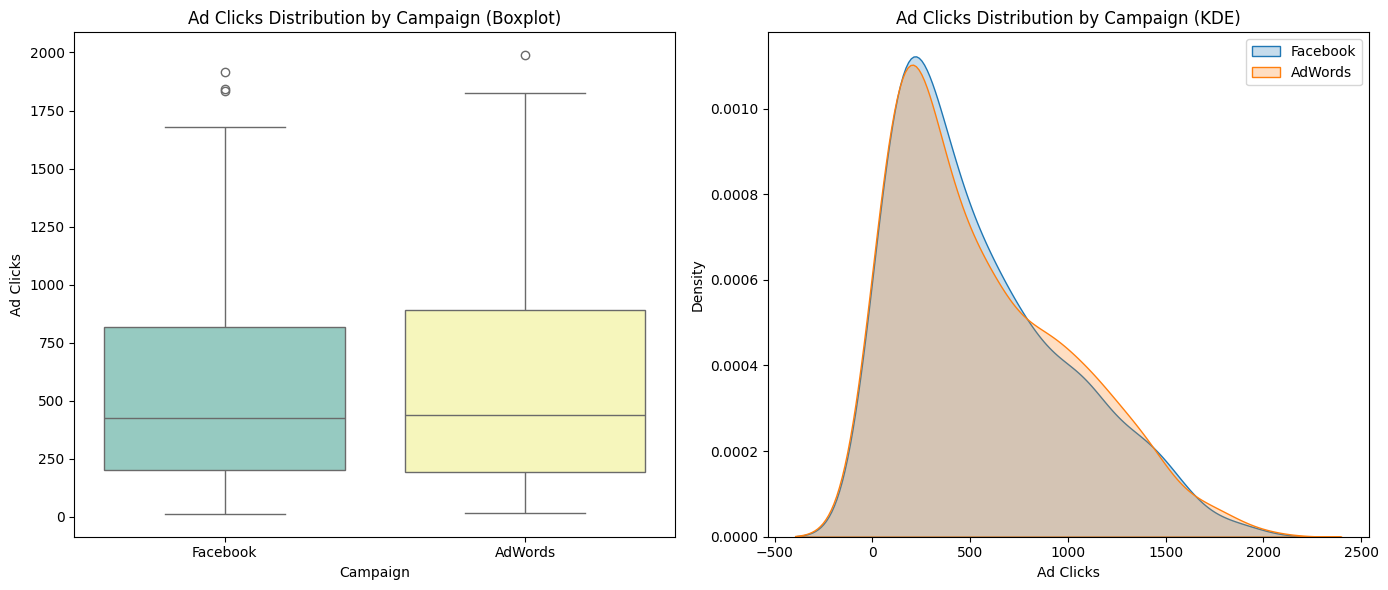

In [166]:
#adclicks analysis for both campaign
plt.figure(figsize=(14, 6))

# 1. Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Campaign', y='Ad Clicks', data=df, palette='Set3')
plt.title('Ad Clicks Distribution by Campaign (Boxplot)')

# 2. KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=facebook_df['Ad Clicks'], label='Facebook', fill=True)
sns.kdeplot(data=adwords_df['Ad Clicks'], label='AdWords', fill=True)
plt.title('Ad Clicks Distribution by Campaign (KDE)')
plt.xlabel('Ad Clicks')
plt.legend()

plt.tight_layout()
plt.show()


### Ad Clicks Analysis – Conclusion

From the **boxplot** and **KDE plot** comparing *Ad Clicks*:

- The **median number of clicks** is very similar for both Facebook and AdWords campaigns.
- The **spread (IQR)** of Ad Clicks is slightly wider for AdWords, indicating more variability in daily user interactions.
- The **KDE plot** shows overlapping distributions, but AdWords appears to have a **slightly higher concentration** of clicks in the upper-mid range (~600–800 clicks).
- **Facebook's distribution** is a bit tighter and more consistent, though slightly lower in peak click volume.

---

###  Conclusion:
While both campaigns received **similar average daily clicks**, **AdWords** shows a **slightly wider range** and higher click potential on some days. However, the difference isn't visually dramatic.


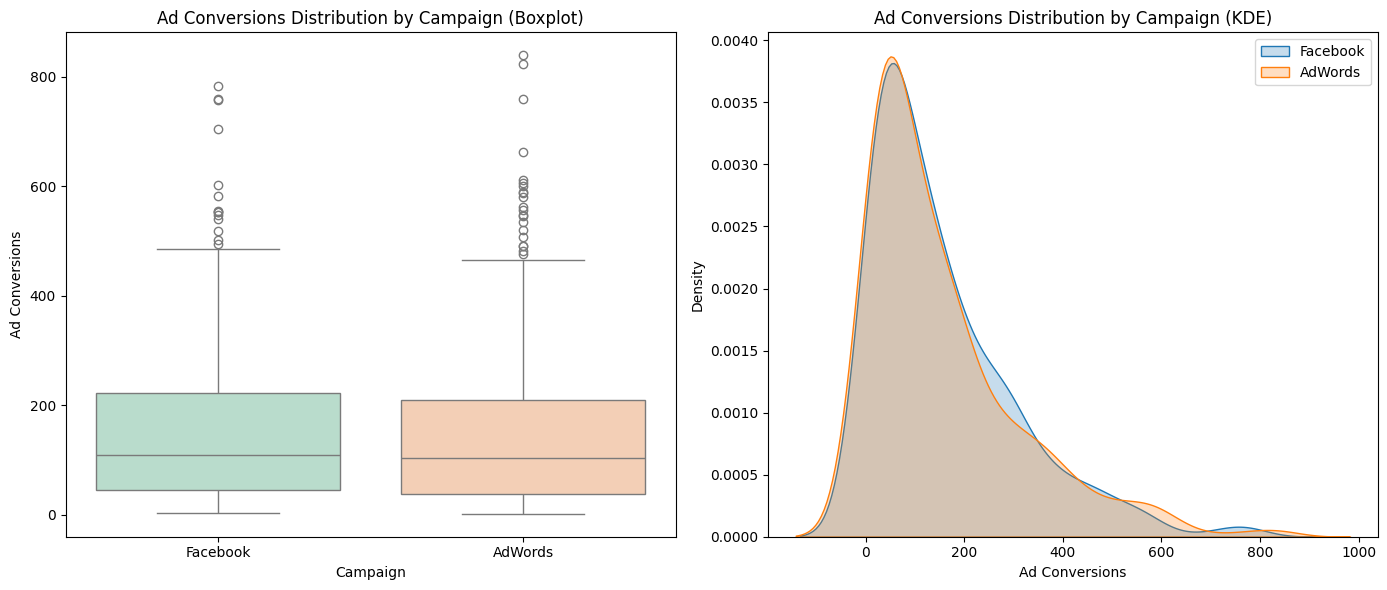

In [167]:
#adconversion analysis for both campaigns
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Campaign', y='Ad Conversions', data=df, palette='Pastel2')
plt.title('Ad Conversions Distribution by Campaign (Boxplot)')

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=facebook_df['Ad Conversions'], label='Facebook', fill=True)
sns.kdeplot(data=adwords_df['Ad Conversions'], label='AdWords', fill=True)
plt.title('Ad Conversions Distribution by Campaign (KDE)')
plt.xlabel('Ad Conversions')
plt.legend()

plt.tight_layout()
plt.show()


###  Ad Conversions Analysis – Conclusion

Based on the **boxplot** and **KDE plot** for daily *Ad Conversions*:

- The **median conversions** for both Facebook and AdWords are relatively close, suggesting similar average performance.
- The **AdWords campaign** shows slightly higher **variability** in daily conversions, visible in both the box height and the wider KDE curve.
- The KDE plot indicates a **slightly stronger tail for AdWords**, suggesting that it occasionally results in **higher conversion spikes**.
- **Facebook’s conversion pattern** is more consistent with a slightly tighter distribution, indicating steadier performance day-to-day.

---

###  Conclusion:
While both campaigns drive a similar **average number of daily conversions**, **AdWords** has a broader distribution and slightly higher conversion potential on certain days.


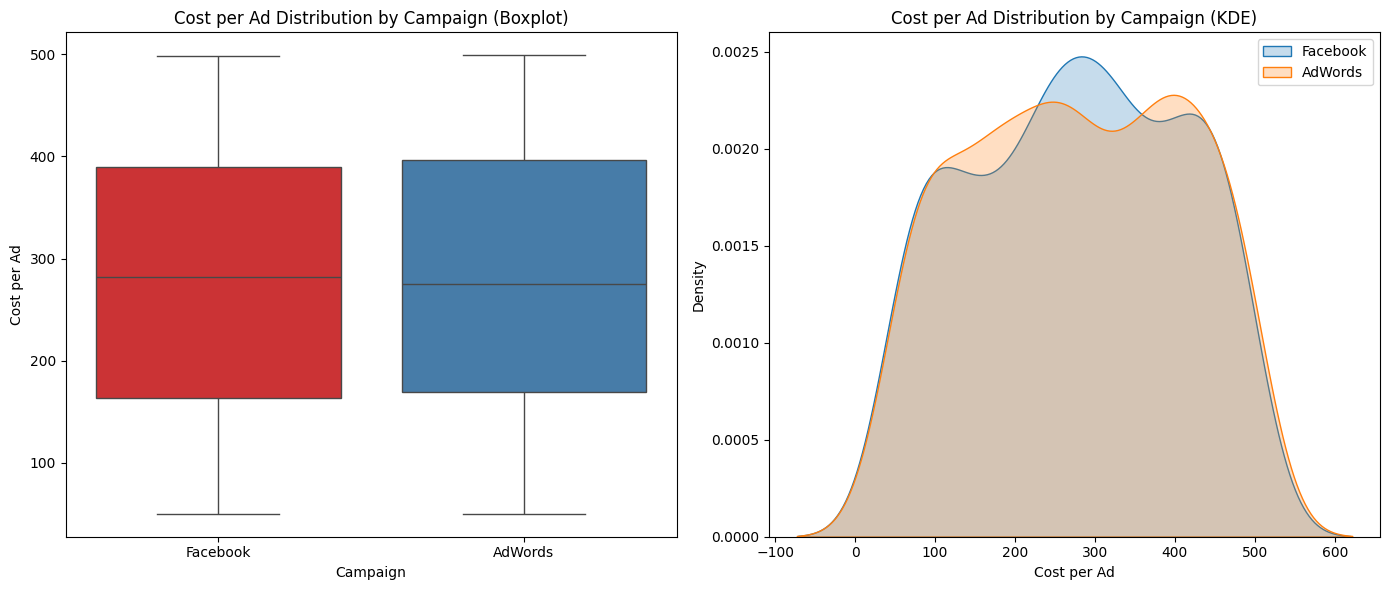

In [168]:
#cost per ad analysis for both campaigns
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Campaign', y='Cost per Ad', data=df, palette='Set1')
plt.title('Cost per Ad Distribution by Campaign (Boxplot)')

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=facebook_df['Cost per Ad'], label='Facebook', fill=True)
sns.kdeplot(data=adwords_df['Cost per Ad'], label='AdWords', fill=True)
plt.title('Cost per Ad Distribution by Campaign (KDE)')
plt.xlabel('Cost per Ad')
plt.legend()

plt.tight_layout()
plt.show()


###  Cost per Ad Analysis – Conclusion

From the **boxplot** and **KDE plot** comparing daily *Cost per Ad*:

- The **median cost per ad** is fairly similar between Facebook and AdWords campaigns.
- The **AdWords campaign** shows **greater variability**, with a wider interquartile range and longer tails in the KDE plot.
- **Facebook's costs** appear more consistent and concentrated within a tighter cost range.
- The KDE plot shows **AdWords has a broader and flatter curve**, indicating more fluctuation in daily ad spend.

---

###  Conclusion:
Although both campaigns have a similar **average ad spend**, **Facebook** maintains a **more stable cost structure**, while **AdWords** demonstrates **more variability**, potentially due to dynamic bidding or budget optimization strategies. This could impact predictability in ad budgeting.


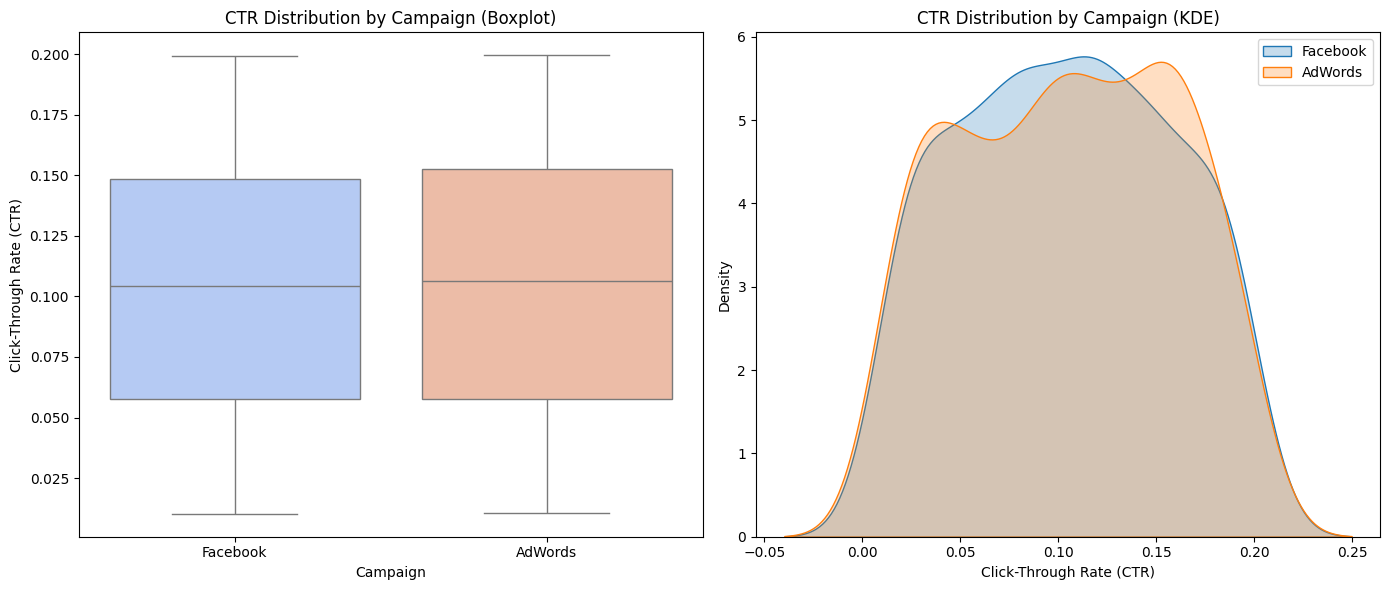

In [169]:
#ctr analysis for both the campaigns
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Campaign', y='Click-Through Rate (CTR)', data=df, palette='coolwarm')
plt.title('CTR Distribution by Campaign (Boxplot)')

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=facebook_df['Click-Through Rate (CTR)'], label='Facebook', fill=True)
sns.kdeplot(data=adwords_df['Click-Through Rate (CTR)'], label='AdWords', fill=True)
plt.title('CTR Distribution by Campaign (KDE)')
plt.xlabel('Click-Through Rate (CTR)')
plt.legend()

plt.tight_layout()
plt.show()


###  Click-Through Rate (CTR) Analysis – Conclusion

Based on the **boxplot** and **KDE plot** for *CTR*:

- **Facebook** appears to have a **higher median CTR**, suggesting it generally performs better in terms of user engagement per view.
- The **spread (IQR)** of CTR is tighter for Facebook, indicating **more consistent performance** across days.
- **AdWords** shows a **wider distribution**, with some days performing quite low and others high — more variable.
- The KDE plot confirms this: Facebook's curve is **sharper and peaks higher**, while AdWords is **flatter**, suggesting less predictability.

---

###  Conclusion:
**Facebook** consistently delivers a **higher and more stable CTR**, meaning users are more likely to click on its ads after seeing them. **AdWords** shows more fluctuation in engagement and might benefit from better targeting or creative optimization.


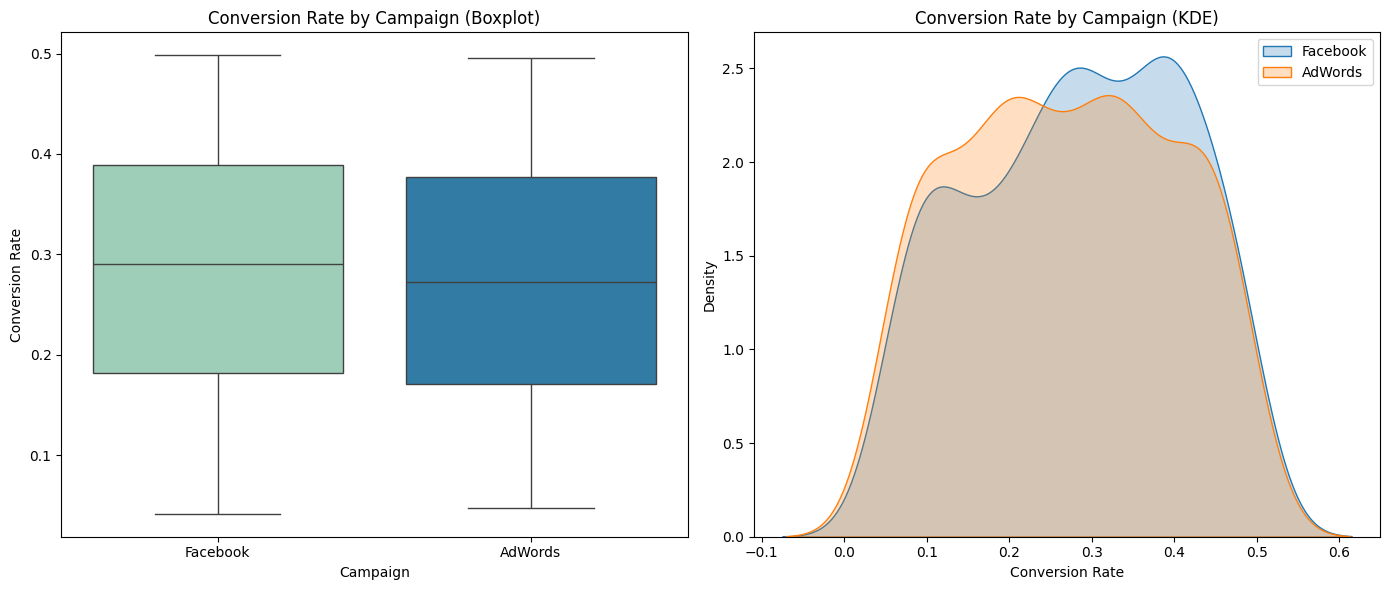

In [170]:
#conversion rate for both campaigns
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Campaign', y='Conversion Rate', data=df, palette='YlGnBu')
plt.title('Conversion Rate by Campaign (Boxplot)')

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=facebook_df['Conversion Rate'], label='Facebook', fill=True)
sns.kdeplot(data=adwords_df['Conversion Rate'], label='AdWords', fill=True)
plt.title('Conversion Rate by Campaign (KDE)')
plt.xlabel('Conversion Rate')
plt.legend()

plt.tight_layout()
plt.show()


###  Conversion Rate Analysis – Conclusion

From the **boxplot** and **KDE plot** comparing *Conversion Rate*:

- The **median conversion rate** is slightly higher for **Facebook**, indicating that a click on Facebook is **more likely to lead to a conversion**.
- **Facebook’s distribution** is tighter, with fewer extreme values, suggesting **consistent conversion performance** across days.
- **AdWords** shows a **wider spread**, with some days performing poorly and others spiking, indicating **less predictability** in conversion efficiency.
- The **KDE plot** shows that Facebook has a more pronounced peak in the higher conversion range, while AdWords is more evenly spread out.

---

###  Conclusion:
**Facebook** performs better in terms of **conversion efficiency**, turning clicks into desired outcomes more consistently. **AdWords**, though capable of high conversions on some days, is **less stable** and may need better funnel optimization.


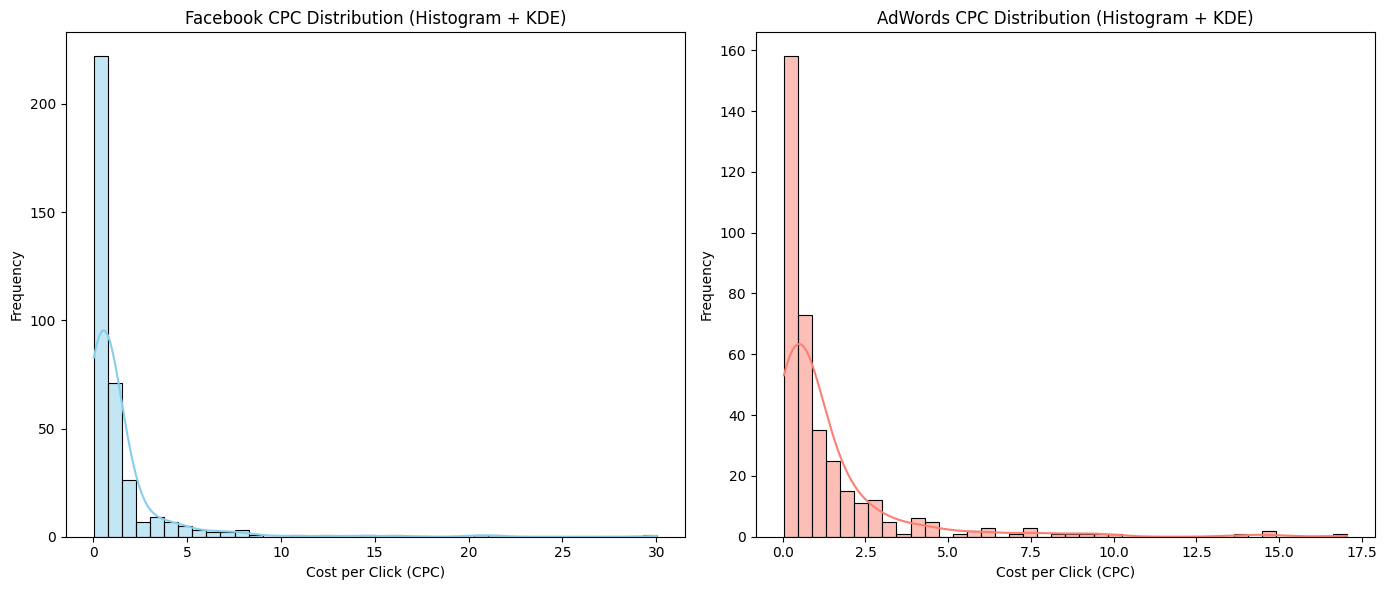

In [171]:
#cpc analysis for both campaigns

plt.figure(figsize=(14, 6))

# Histogram with KDE for Facebook
plt.subplot(1, 2, 1)
sns.histplot(facebook_df['Cost per Click (CPC)'], bins=40, kde=True, color='skyblue')
plt.title('Facebook CPC Distribution (Histogram + KDE)')
plt.xlabel('Cost per Click (CPC)')
plt.ylabel('Frequency')

# Histogram with KDE for AdWords
plt.subplot(1, 2, 2)
sns.histplot(adwords_df['Cost per Click (CPC)'], bins=40, kde=True, color='salmon')
plt.title('AdWords CPC Distribution (Histogram + KDE)')
plt.xlabel('Cost per Click (CPC)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


###  Cost per Click (CPC) Analysis – Conclusion
Based on the histogram and KDE plots for CPC:

- **Facebook’s CPC distribution** is **sharply peaked at the lower end**, with most CPC values **concentrated below ₹2**, suggesting it's usually **more cost-effective per click**.
- **AdWords’ CPC distribution** is **flatter**, showing **greater spread and variability** — indicating that while some days have low CPC, many days incur **significantly higher costs per click**.
- The KDE lines reinforce this: **Facebook’s CPC** curve is **steep and narrow**, showing consistent performance, while **AdWords has a broader tail**, signaling more **frequent high-CPC days**.
- Facebook’s tighter clustering makes it a more **predictable and budget-friendly option**, whereas AdWords might need **cost optimization strategies**.

---

###  Conclusion:
**Facebook** remains the more **cost-efficient platform per click** with **lower and more consistent CPC values**. In contrast, **AdWords** shows **more variation and higher cost spikes**, requiring closer monitoring and budget adjustments.


##  Summary Comparison: Facebook vs AdWords Campaigns (2019)

This summary aggregates key performance metrics across both Facebook and AdWords campaigns for a high-level comparison:

| Metric                      | Facebook  | AdWords   | Insights |
|----------------------------|-----------|-----------|----------|
| **Ad Views**               | 5270      | 5379      | AdWords achieved slightly higher reach. |
| **Ad Clicks**              | 555       | 567       | AdWords generated more user clicks. |
| **Ad Conversions**         | 157       | 156       | Facebook converted slightly better despite fewer clicks. |
| **Cost per Ad**            | 277       | 278       | Both campaigns spent nearly the same per ad. |
| **Click-Through Rate (CTR)** | 0.104     | 0.105     | AdWords had a marginally better CTR. |
| **Conversion Rate**        | 0.284     | 0.271     | Facebook had a stronger ability to convert clicks into actions. |
| **Cost per Click (CPC)**   | 1.40      | 1.34      | AdWords had a slightly more cost-efficient CPC. |

###  Final Verdict:

- **Facebook** is more **cost-efficient** and delivers **better conversion performance**, making it ideal for **budget-conscious and action-focused campaigns**.
- **AdWords** generates **more clicks** and performs well in **attracting attention (CTR)**, but at a **higher and less predictable cost**, making it better for **brand awareness or traffic-heavy strategies**.


# Hypothesis testing

##  Hypothesis Test: Ad Clicks
To test whether there is a significant difference in mean **Ad Clicks** between **Facebook** and **AdWords** campaigns.

###  Hypotheses:
- **Null Hypothesis (H₀)**: The mean Ad Clicks are the same for both campaigns.
- **Alternative Hypothesis (H₁)**: The mean Ad Clicks differ between the two campaigns.

- If p-value < 0.05: We **reject the null hypothesis**. There is a significant difference in Ad Clicks.
- If p-value ≥ 0.05: We **fail to reject the null hypothesis**. No significant difference was detected.


In [172]:
from scipy.stats import ttest_ind

# Example: Ad Clicks
facebook_clicks = facebook_df['Ad Clicks']
adwords_clicks = adwords_df['Ad Clicks']

# Perform t-test
t_stat, p_val = ttest_ind(facebook_clicks, adwords_clicks)

# Print results
print("T-statistic:", round(t_stat, 4))
print("P-value:", round(p_val, 4))


T-statistic: -0.3489
P-value: 0.7272


###  Results:
- **T-statistic** = *-0.3489*
- **P-value** = **0.7272**

### ✅ Conclusion:
Since the **p-value (0.72) > 0.05**, we **fail to reject the null hypothesis**.  
There is **no statistically significant difference** in the mean Ad Clicks between Facebook and AdWords campaigns.

> Interpretation: Although AdWords had slightly more clicks on average, the difference is **not statistically significant** — it could be due to random variation.

# Regression Analysis

In [173]:
df.head()

,Date,Campaign,Ad Views,Ad Clicks,Ad Conversions,Cost per Ad,Click-Through Rate (CTR),Conversion Rate,Cost per Click (CPC)
0,2019-01-01,Facebook,7770,364,78,342.575308,0.046847,0.214286,0.941141
1,2019-01-02,Facebook,1360,119,32,214.113762,0.087500,0.268908,1.799275
2,2019-01-03,Facebook,5890,841,364,302.304737,0.142784,0.432818,0.359459
3,2019-01-04,Facebook,5691,206,18,266.477848,0.036198,0.087379,1.293582
4,2019-01-05,Facebook,6234,219,90,448.249260,0.035130,0.410959,2.046800


In [191]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


# Define features and target
features = ['Ad Views','Ad Clicks','Cost per Ad','Ad Conversions','Click-Through Rate (CTR)','Cost per Click (CPC)']
target = 'Conversion Rate'

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [192]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [193]:
# Predict and evaluate
y_pred = model.predict(X_test)


In [194]:
r2 = r2_score(y_test, y_pred)
r2

0.5921737336191807

In [195]:
mse = mean_squared_error(y_test, y_pred)

# Take square root to get RMSE
rmse = np.sqrt(mse)

print("RMSE:", round(rmse, 4))

RMSE: 0.0834


In [196]:
# Coefficients
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).round(4)
print(coeff_df)

                    Feature  Coefficient
0                  Ad Views       0.0000
1                 Ad Clicks      -0.0003
2               Cost per Ad      -0.0000
3            Ad Conversions       0.0012
4  Click-Through Rate (CTR)      -0.0406
5      Cost per Click (CPC)      -0.0021


##  Regression Analysis Summary – Predicting Conversion Rate

###  Objective:
To predict the **Conversion Rate** of advertising campaigns based on key performance metrics from **Facebook** and **AdWords** data.

---

###  Model Details:
- **Model Used**: Multiple Linear Regression
- **Target Variable**: Conversion Rate
- **Features Used**:
  - Ad Views
  - Ad Clicks
  - Ad Conversions
  - Cost per Ad
  - Click-Through Rate (CTR)
  - Cost per Click (CPC)

---

###  Model Performance:
- **R² Score**: `0.59`  
  → The model explains **59%** of the variance in Conversion Rate.
  
- **RMSE**: `0.0834`  
  → On average, the model’s predictions deviate from the actual conversion rate by **~8.34 percentage points**.

---

###  Feature Coefficient Interpretation:

| Feature                   | Coefficient | Impact Summary                                           |
|---------------------------|-------------|----------------------------------------------------------|
| **Ad Conversions**        | +0.0012     | Strongest positive predictor of Conversion Rate          |
| **Click-Through Rate (CTR)** | –0.0406 | Negative impact – high CTR may not lead to more conversions |
| **Cost per Click (CPC)**  | –0.0021     | Slightly reduces Conversion Rate                         |
| **Ad Clicks**             | –0.0003     | Small negative effect                                    |
| **Ad Views**              | +0.0000     | Neutral impact                                           |
| **Cost per Ad**           | –0.0000     | Neutral impact                                           |

---

###  Conclusion:
- The model has **moderate predictive power**, useful for understanding trends and evaluating campaign strategies.
- The most important **positive predictor** is **Ad Conversions**, as expected.
- Surprisingly, **CTR** and **CPC** negatively influence conversion rate, possibly indicating issues with ad quality or targeting.
- Future improvements could include:
  - Handling multicollinearity
  - Feature selection
  - Non-linear models (e.g., decision trees)
  - Adding campaign type (`Campaign_AdWords`) as a binary variable

> This regression offers actionable insights into which ad metrics truly drive conversion performance.
